In [4]:
#basic libraries 
import pandas as pd
import numpy as np
import warnings

from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

#for Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

df = pd.read_excel(r'/Users/shailendra0408/Desktop/CSA_Temp.xlsx')
print (df.shape)
df


(4469, 3)


,Temperature,Relative Humidity,Solar Radiation
0,12.7,92,230
1,12.7,92,265
2,12.7,91,300
3,13.0,91,300
4,13.2,89,360
...,...,...,...
4464,21.5,70,0
4465,21.6,69,0
4466,21.8,69,0
4467,21.1,73,0


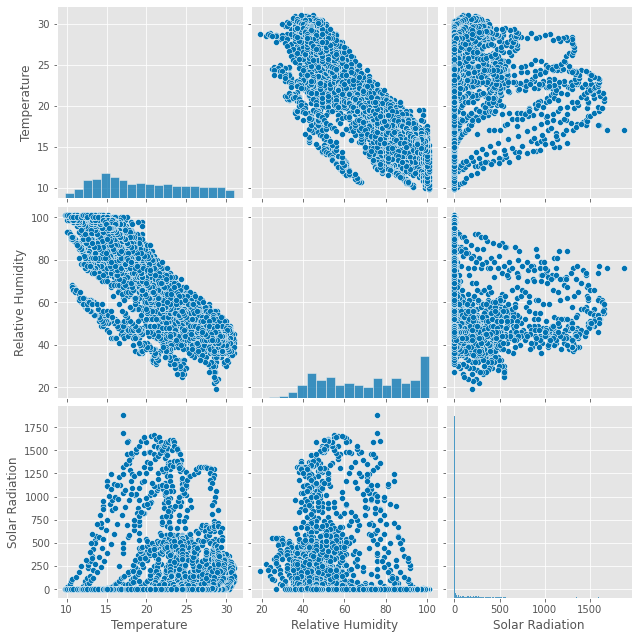

In [5]:
sns.set_palette('colorblind')
sns.pairplot(data=df, height=3)

In [6]:
X = df[['Relative Humidity','Solar Radiation']]
y = df['Temperature']

regr = linear_model.LinearRegression()
model = regr.fit(X,y)

print ('Intercept', model.intercept_)
print ('Coefficients',model.coef_)


Intercept 35.297018767695036
Coefficients [-0.22132611 -0.00060398]


Lets use the model to predict the future temperature. 

The model based upon intercept and coefficients is 

y = 35.29 - 0.22* x1 + 0.00060 * x2 
Where y = Forecasted Temperature, X1 is Relative Humidity and x2 is Solar Radiation 

In [27]:
Relative_humidity  = input ('Provide the input RH')
Solar_Radiation = input ('Provide the input Solar Radiation value')

try:
    print ('We predicted that Temperature would be {} if Relative Humidity would be {} and solar radiation would be {} .'.format(
    model.predict([[float(Relative_humidity),float(Solar_Radiation)]])[0],Relative_humidity, Solar_Radiation))

except ValueError:
    print('Please only input either:\n- whole number e.g. 1, 4, 7\n- decimal/float number e.g. 3.8')




We predicted that Temperature would be 24.46428223265719 if Relative Humidity would be 45.67 and solar radiation would be 1200 .


Visualization 


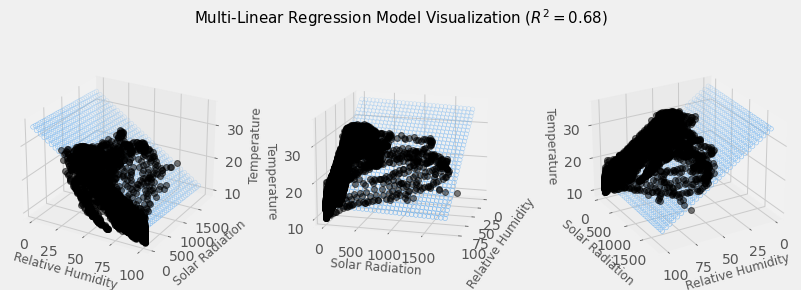

In [30]:
X = df[['Relative Humidity', 'Solar Radiation']].values.reshape(-1,2)
Y = df['Temperature']

# Create range for each dimension
x = X[:, 0]
y = X[:, 1]
z = Y

xx_pred = np.linspace(0, 99, 30)  # range of Relative Humidity 
yy_pred = np.linspace(0, 1800, 30)  # range of Solar Radiation 
xx_pred, yy_pred = np.meshgrid(xx_pred, yy_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

predicted = model.predict(model_viz)

r2 = model.score(X, Y)

# Plot model visualization
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Relative Humidity ', fontsize=12)
    ax.set_ylabel('Solar Radiation', fontsize=12)
    ax.set_zlabel('Temperature', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=25, azim=-60)
ax2.view_init(elev=15, azim=15)
ax3.view_init(elev=25, azim=60)

fig.suptitle('Multi-Linear Regression Model Visualization ($R^2 = %.2f$)' % r2, fontsize=15, color='k')

fig.tight_layout()
